In [100]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd; import numpy as np 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics  import silhouette_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns




In [78]:
df = pd.read_csv("00_Data/processed_data.csv")

df_norm = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

X = df_norm.drop('expenses', axis=1)
y = df_norm['expenses']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=23)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (1132, 9)
Testing data shape: (200, 9)
Training labels shape: (1132,)
Testing labels shape: (200,)


In [72]:
df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.8,1,1725.55,1.0,0.0,0.0,0.0,1.0,0.0
2,33,22.7,0,21984.47,1.0,0.0,0.0,1.0,0.0,0.0
3,32,28.9,0,3866.86,1.0,0.0,0.0,1.0,0.0,0.0
4,31,25.7,0,3756.62,0.0,0.0,0.0,0.0,1.0,0.0


### 01) Linear & Polynomial Fit 

In [101]:
"Linear Fit"
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred_linear = linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

"Polynomial Fit with n=3"
poly = PolynomialFeatures(degree=3)

linear.fit(poly.fit_transform(X_train),y_train)
y_pred_poly = linear.predict(poly.transform(X_test))
mse_poly = mean_squared_error(y_test,y_pred_poly)


print(f"Mean Squared Error (Lasso): {mse_linear:.5f}; Mean Squared Error (Ridge): {mse_poly:.5f} ")

Mean Squared Error (Lasso): 0.01226; Mean Squared Error (Ridge): 0.00914 


#### Scatterplot of the Linear and Polynomial Fit 

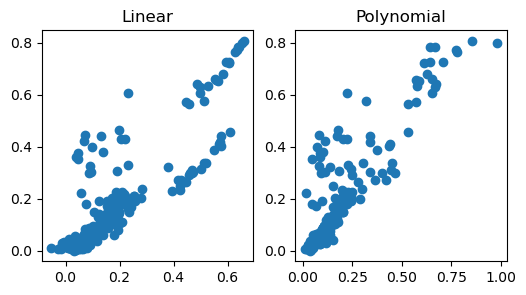

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# Plot the first scatter plot
axs[0].scatter(y_pred_linear, y_test)
axs[0].set_title('Linear')

# Plot the second scatter plot
axs[1].scatter(y_pred_poly, y_test)
axs[1].set_title('Polynomial')

# Show the plot
plt.show()

The polynomial fit shows a more linear scatterplot and thus has a better fit than the linear model.  

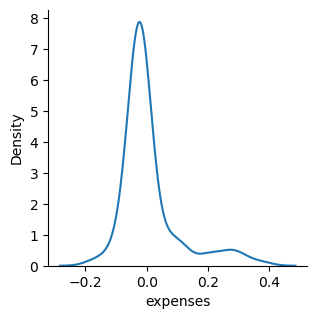

In [110]:
residuals_poly = y_test-y_pred_poly

g = sns.displot(residuals_poly,kind='kde')
g.fig.set_figwidth(3)
g.fig.set_figheight(3)


### 02) Ridge, Lasso and Elastic Net models      

Alpha:10000
Mean Squared Error (Lasso): 0.04074; Mean Squared Error (Ridge): 0.03976 
Alpha:1000
Mean Squared Error (Lasso): 0.04074; Mean Squared Error (Ridge): 0.03283 
Alpha:100
Mean Squared Error (Lasso): 0.04074; Mean Squared Error (Ridge): 0.01596 
Alpha:10
Mean Squared Error (Lasso): 0.04074; Mean Squared Error (Ridge): 0.01224 
Alpha:5
Mean Squared Error (Lasso): 0.04074; Mean Squared Error (Ridge): 0.01221 
Alpha:1
Mean Squared Error (Lasso): 0.04074; Mean Squared Error (Ridge): 0.01224 
Alpha:0.1
Mean Squared Error (Lasso): 0.04074; Mean Squared Error (Ridge): 0.01225 
Alpha:0.01
Mean Squared Error (Lasso): 0.01481; Mean Squared Error (Ridge): 0.01225 
Alpha:0.001
Mean Squared Error (Lasso): 0.01233; Mean Squared Error (Ridge): 0.01225 
Alpha:0.0001
Mean Squared Error (Lasso): 0.01225; Mean Squared Error (Ridge): 0.01225 
Alpha:1e-05
Mean Squared Error (Lasso): 0.01225; Mean Squared Error (Ridge): 0.01225 


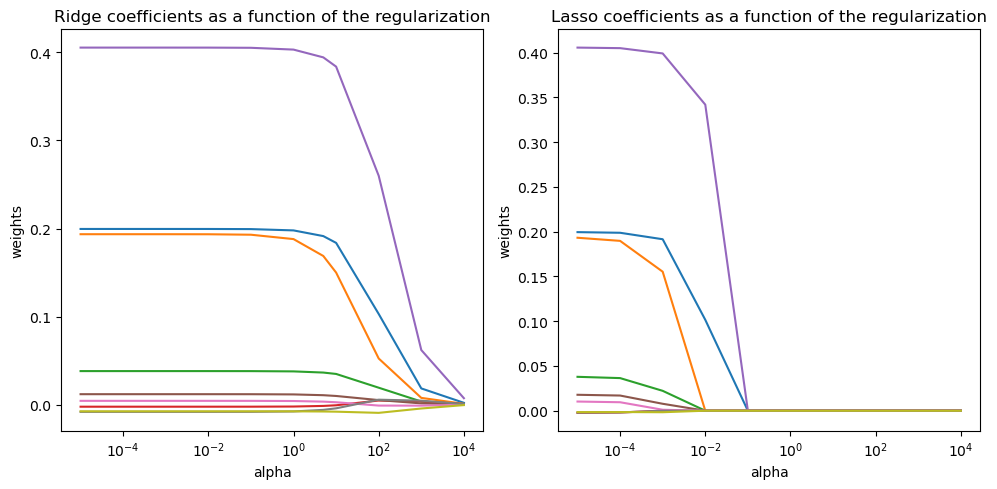

In [4]:
alpha_ls = [10000,1000,100,10,5,1,0.1,0.01,0.001,0.0001,0.00001]
ridge_coefs = []
lasso_coefs = []

for alpha in alpha_ls:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)

    y_pred_lasso = lasso.predict(X_test)
    y_pred_ridge = ridge.predict(X_test)

    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

    print (f"Alpha:{alpha}")
    print(f"Mean Squared Error (Lasso): {mse_lasso:.5f}; Mean Squared Error (Ridge): {mse_ridge:.5f} ")
    # print ()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot Ridge coefficients
ax1.plot(alpha_ls, ridge_coefs)
ax1.set_xscale("log")
# ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_xlabel("alpha")
ax1.set_ylabel("weights")
ax1.set_title("Ridge coefficients as a function of the regularization")

# Plot Lasso coefficients
ax2.plot(alpha_ls, lasso_coefs)
ax2.set_xscale("log")
# ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel("alpha")
ax2.set_ylabel("weights")
ax2.set_title("Lasso coefficients as a function of the regularization")

plt.tight_layout()
plt.show()



For **lasso regression**, the weighing parameter $\alpha$ with $0.0001$ and for **ridge regression**, the weighing parameter $\alpha$ with $10$ seems the reasonable choice. 

In [5]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

for feature, coef in zip(X.columns, lasso.coef_):
    print(feature, coef)

age 0.19870584157637564
bmi 0.18966573738294845
children 0.03642673619897507
sex_male -0.001959455325636301
smoker_yes 0.4048707884682868
region_northeast 0.016949599138688806
region_northwest 0.009476232346587942
region_southeast -0.0019251012208859174
region_southwest -0.00149010858846368


In [6]:
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

for feature, coef in zip(X.columns, ridge.coef_):
    print(feature, coef)

age 0.1995001242344798
bmi 0.19352639231593047
children 0.038013323665360185
sex_male -0.0024388551633817814
smoker_yes 0.4055480634234242
region_northeast 0.011776657411677183
region_northwest 0.004216294065161463
region_southeast -0.008330460939475098
region_southwest -0.007662486814234408


From the coefficients of both the ridge and lasso regression, we find that sex has little or no influence on the models and smoking has a great influence on the target variable. 

In [7]:
for alpha in alpha_ls:
    elastic_net = ElasticNet(alpha= alpha,l1_ratio=0.5)
    elastic_net.fit(X,y)
    y_pred_elastic = elastic_net.predict(X_test)
    mse_elastic = mean_squared_error(y_test, y_pred_elastic)
    print(f"Mean Squared Error (Lasso): {mse_lasso:.5f}")
    print ()

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225

Mean Squared Error (Lasso): 0.01225



### 03) Support Vector Machines                                                                        

In [8]:
# Fit an SVM regression model with an RBF kernel
svr = SVR(kernel='rbf', gamma=0.5, C=10.0)         
svr.fit(X_train, y_train)         

# Predict on the test set and compute the mean squared error
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.5f}".format(mse))

Mean squared error: 0.01214


In [9]:
# Fit an SVM regression model with an Polynomial kernel
svr = SVR(kernel='poly', degree=4, C=10.0)         
svr.fit(X_train, y_train)         

# Predict on the test set and compute the mean squared error
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.5f}".format(mse))

Mean squared error: 0.01199


### 04) K-Nearest Neighbours (KNN)

We choose the k value that minimizes the average RMSE over the 10-fold cross-validation. In this example, we choose the k value that yields the lowest RMSE.

In [10]:
# Define a range of k values to test
k_range = range(1, 21)

# Perform 10-fold cross-validation for each k value
cv_scores = []

for k in k_range:
    regressor = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(np.sqrt(-scores.mean()))

# Find the optimal k value
optimal_k = k_range[cv_scores.index(min(cv_scores))]
print('Optimal k:', optimal_k)

Optimal k: 5


In [13]:
regressor = KNeighborsRegressor(n_neighbors=optimal_k)

regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))

Mean squared error: 0.01092


### 05) Decision Trees and Random Forest

#### Decision Tree (CART)

We then define a parameter grid to search over using the param_grid dictionary. In this case, we are tuning the max_depth parameter to take on the values [3, 5, 7, 9, 11]

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor, plot_tree



dt_model = DecisionTreeRegressor(random_state=0)

dt_model.fit(X_train, y_train)

param_grid = {'max_depth': [3, 5, 7, 9, 11],
              'min_samples_leaf': [4, 6, 8, 16]}

# Define the scoring metric to use
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)
mse = mean_squared_error(y_test, y_pred)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))

Best parameters: {'max_depth': 5, 'min_samples_leaf': 8}
Best mean squared error: 0.00569


In [45]:
'''Fitting the model with the best model parameters'''
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=8, random_state=0)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_split=8, random_state=0)

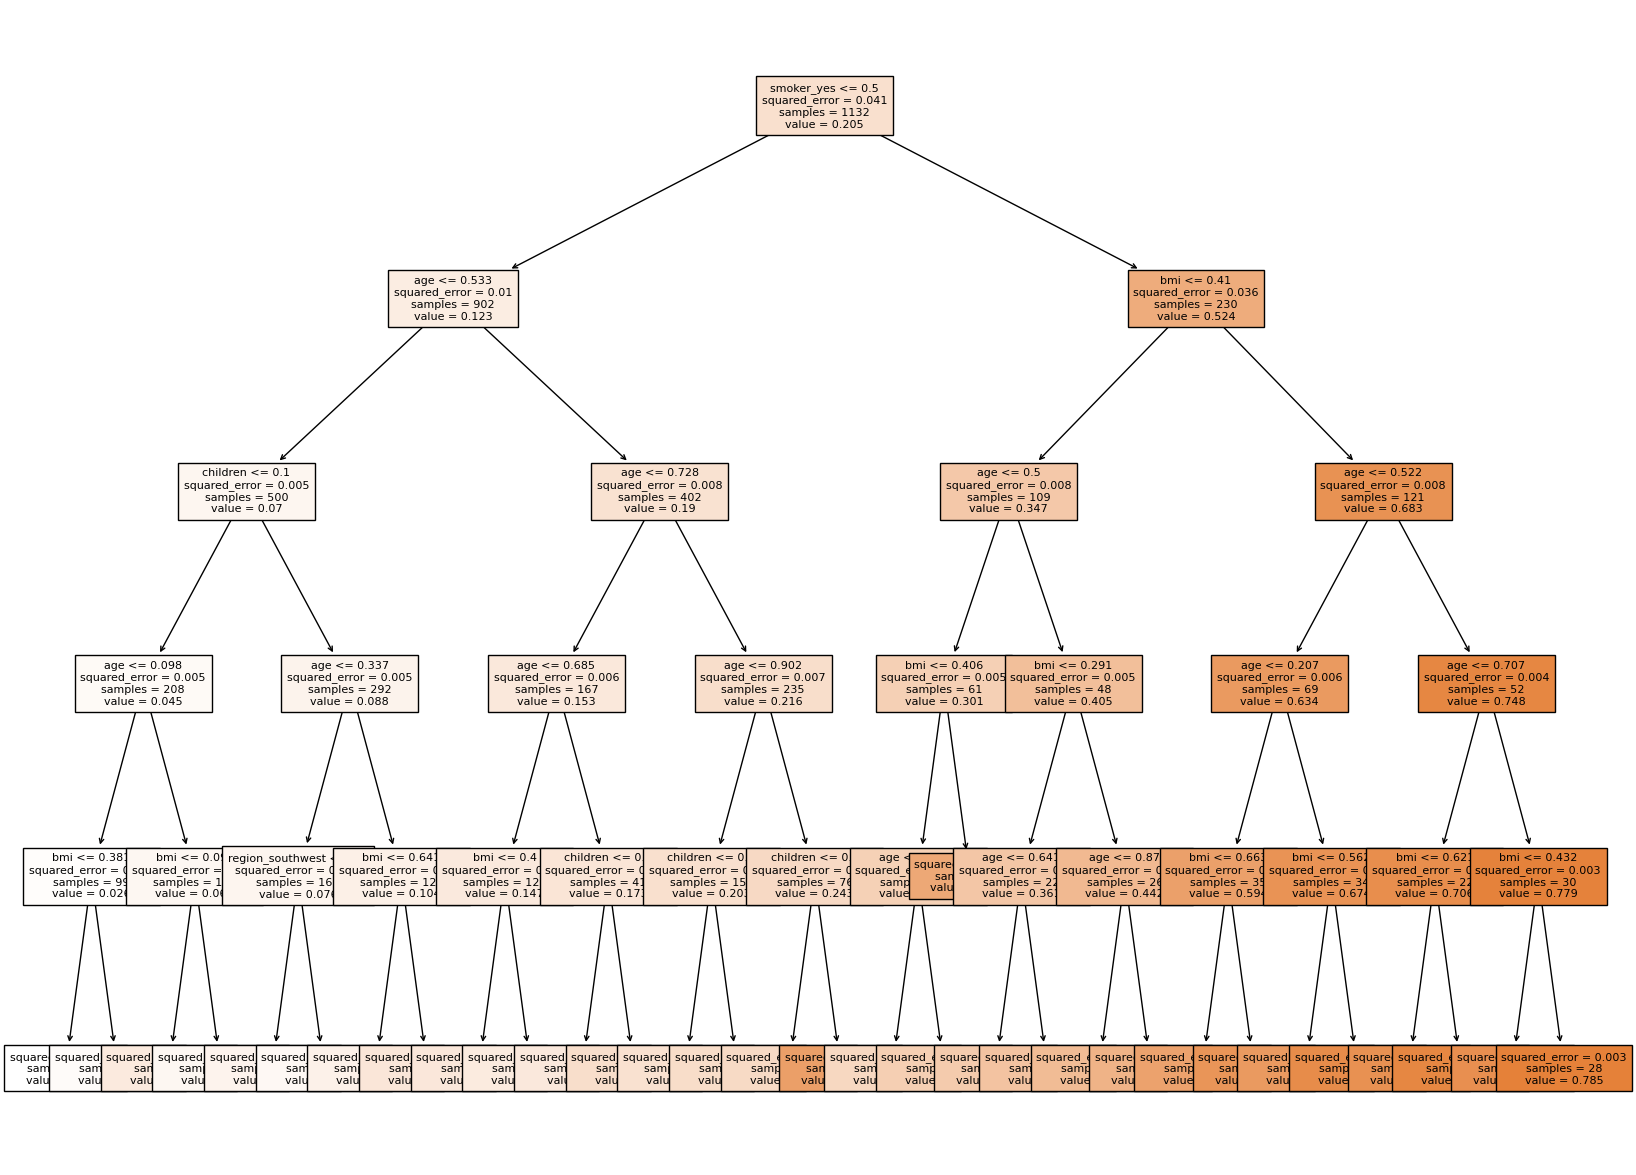

In [47]:
plt.figure(figsize=(20, 15))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, fontsize=8)
plt.show()

#### Random Forest

We are tuning the *n_estimators*, *max_depth*, *min_samples_split*, and *min_samples_leaf* parameters to take on different values. We perform a grid search over the parameter grid using cross-validation with 5 folds using the GridSearchCV function from Scikit-learn and get the best parameters from the grid-search. 

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [4, 6, 8, 16]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}
Best mean squared error: -0.00538


In [61]:
rf = RandomForestRegressor(max_depth=5,n_estimators=200,min_samples_split=2,min_samples_leaf=8,random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.5f}".format(mse))

Mean squared error: 0.00767


### 06) Gradient Boosted 

In [55]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()

# Define the parameter grid to search over
param_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5)

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best score:  0.85739773698718


In [59]:
xg_reg = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=50)

xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.5f}".format(mse))


Mean squared error: 0.00796
